# Feedforward Neural Network Implementation with Keras and TensorFlow: CIFAR-10 Dataset
This Jupyter notebook demonstrates the implementation of a feedforward neural network using Keras and TensorFlow. The goal of this assignment is to walk through the process of building, training, and evaluating a neural network for image classification. We will use the MNIST or CIFAR-10 dataset as per your choice.<br>
Dataset: https://www.cs.toronto.edu/%7Ekriz/cifar.html <br>
Info: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

## Assignment Steps:

**a. Import the necessary packages**: We will start by importing the required Python libraries, including Keras, TensorFlow, and other essential packages.

**b. Load the training and testing data**: In this step, we will load the dataset (either MNIST or CIFAR-10) for training and testing the neural network.

**c. Define the network architecture using Keras**: Here, we will define the architecture of our feedforward neural network, specifying the number of layers, neurons, and activation functions.

**d. Train the model using SGD (Stochastic Gradient Descent)**: We will use the Stochastic Gradient Descent optimizer to train the neural network on the training data.

**e. Evaluate the network**: After training, we will evaluate the performance of the model on the testing data to assess its accuracy and other relevant metrics.

**f. Plot the training loss and accuracy**: We will create plots to visualize the training loss and accuracy over epochs, providing insights into the model's learning progress.

Feel free to follow along with the code and explanations provided in this notebook to gain a better understanding of building and training neural networks for image classification.

# Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data<br>
b. Defining the model’s architecture<br>
c. Training the model<br>
d. Estimating the model’s performance<br>

Note: Both assignment can use this code accordingly

In [9]:
# !pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [10]:
# Define the paths to the training and testing data directories
# D:\Eng\B.E\DL\deepLearning\dataset\cifar-10-img\cifar-10-img\train
train_data_dir = 'dataset/cifar-10-img/cifar-10-img/train'
test_data_dir = 'dataset/cifar-10-img/cifar-10-img/test'

In [11]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 20000
test_batch_size = 2000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during testing
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [12]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [13]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (20000, 32, 32, 3)
Shape of y_train (20000, 10)
Shape of x_test  (2000, 32, 32, 3)
Shape of y_test  (2000, 10)


In [14]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [15]:
x_train.shape[1:]

(32, 32, 3)

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, layers


In [18]:
# Create a list of layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

C:\Users\Vedant Gadekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
from tensorflow.keras.optimizers import SGD
# Compile the model
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
              batch_size=20,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 49s 45ms/step - accuracy: 0.3139 - loss: 1.9284 - val_accuracy: 0.4285 - val_loss: 1.5768
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.5006 - loss: 1.3811 - val_accuracy: 0.5340 - val_loss: 1.2783
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.5918 - loss: 1.1501 - val_accuracy: 0.5805 - val_loss: 1.1901
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.6358 - loss: 1.0256 - val_accuracy: 0.6250 - val_loss: 1.0572
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.6762 - loss: 0.9135 - val_accuracy: 0.5485 - val_loss: 1.3287
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.7144 - loss: 0.8143 - val_accuracy: 0.6260 - val_loss: 1.0769
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.7321 - loss: 0.7411 - val_accuracy: 0.6800 - val_loss: 0.9049
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.7650 -

C:\Users\Vedant Gadekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vedant Gadekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


TypeError: unhashable type: 'list'

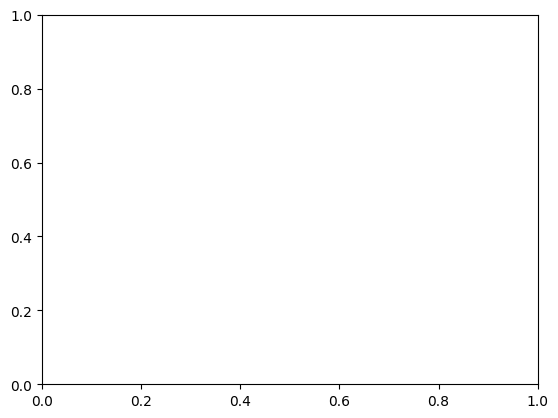

In [20]:
import seaborn as sns
sns.lineplot(model.history.history)

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6798 - loss: 0.9574
Loss:  0.9088892340660095
Accuracy:  0.6959999799728394


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


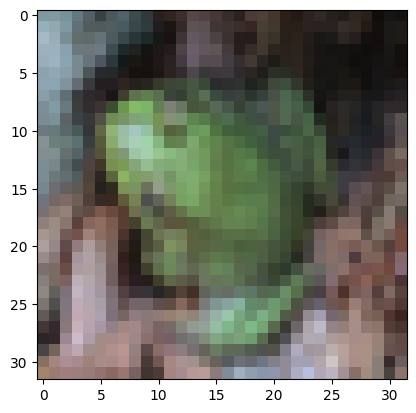

frog


In [25]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[26])
plt.show()
print(class_names[np.argmax(predicted_value[26], axis=0)])